In [1]:
!pip install pyspellchecker
!pip install stopwordsiso
!pip install pyvis
!pip install spacy
!python -m spacy download fr_core_news_sm
import pandas as pd
import re
from spellchecker import SpellChecker
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 38.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Load data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Projet Intégré S8 (Tweets Réchauffement Climatique)/LabeledTestDataset.csv')

# Separate tweets based on polarity
positive_tweets = data[data['Polarity'] == 1.0]['Preprocessed_Tweet']
negative_tweets = data[data['Polarity'] == -1.0]['Preprocessed_Tweet']

Mounted at /content/drive


In [4]:
# Combining words for each Polarity
positive_text = " ".join(positive_tweets)
negative_text = " ".join(negative_tweets)

In [5]:
# Tokenize the combined strings into individual words
positive_words = nltk.word_tokenize(positive_text)
negative_words = nltk.word_tokenize(negative_text)

In [6]:
# Printing proportions of Polarity:
data['Polarity'].value_counts()/len(data)

Polarity
 1.0    0.660666
-1.0    0.339334
Name: count, dtype: float64

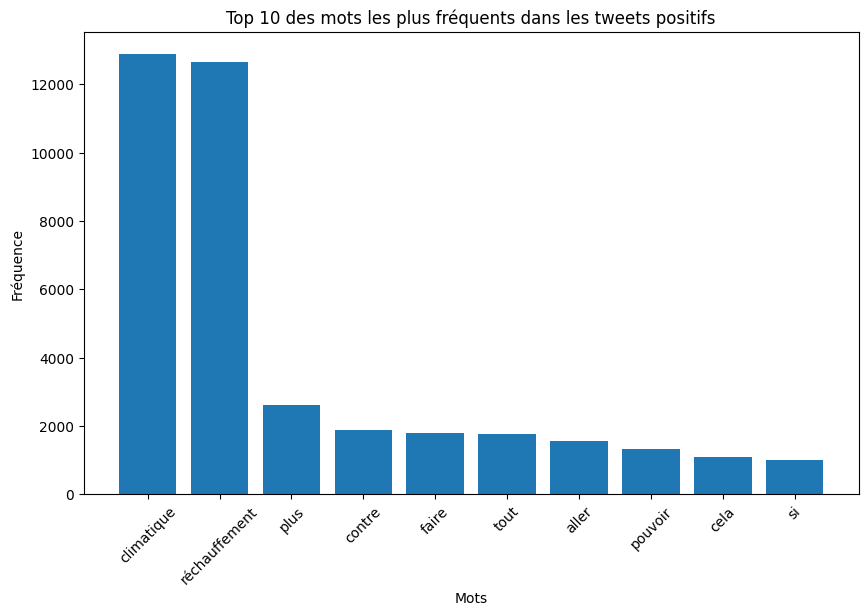

In [7]:
# Calculate word frequencies
positive_word_freq = nltk.FreqDist(positive_words)
negative_word_freq = nltk.FreqDist(negative_words)

# Get the top 10 most common words in positive tweets
top_positive_words = positive_word_freq.most_common(10)
top_positive_words = dict(top_positive_words)

# Get the top 10 most common words in negative tweets
top_negative_words = negative_word_freq.most_common(10)
top_negative_words = dict(top_negative_words)

# Plotting the barplot for positive words
plt.figure(figsize=(10, 6))
plt.bar(top_positive_words.keys(), top_positive_words.values())
plt.title("Top 10 des mots les plus fréquents dans les tweets positifs")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

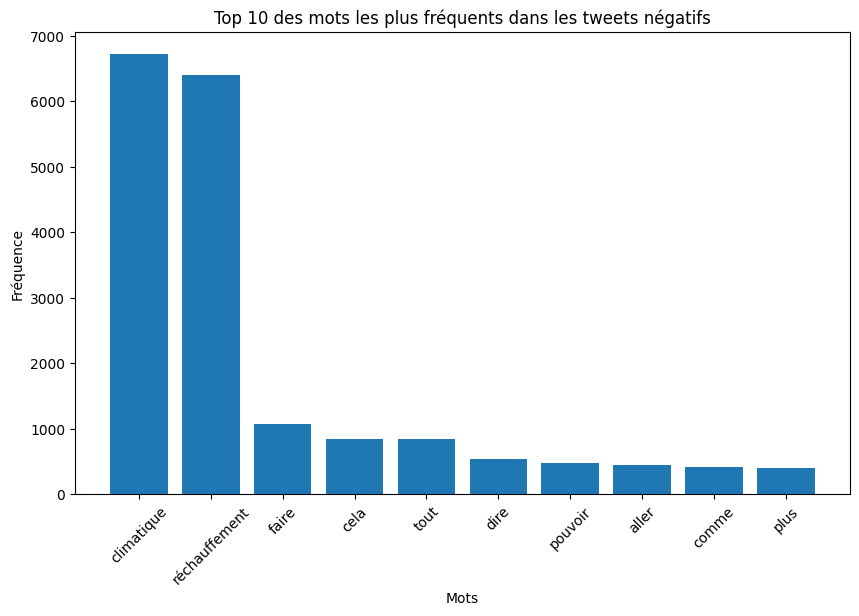

In [8]:
# Plotting the barplot for negative words
plt.figure(figsize=(10, 6))
plt.bar(top_negative_words.keys(), top_negative_words.values())
plt.title("Top 10 des mots les plus fréquents dans les tweets négatifs")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Customization options for word cloud
wordcloud_options = {
    'background_color': 'white',
    'max_words': 150,
    'width':  1920,
    'height': 1080,
    'collocations': False,
    'relative_scaling': 0.1
}

In [10]:
# Create word clouds for each polarity
positive_wordcloud = WordCloud(**wordcloud_options).generate(positive_text)
negative_wordcloud = WordCloud(**wordcloud_options).generate(negative_text)

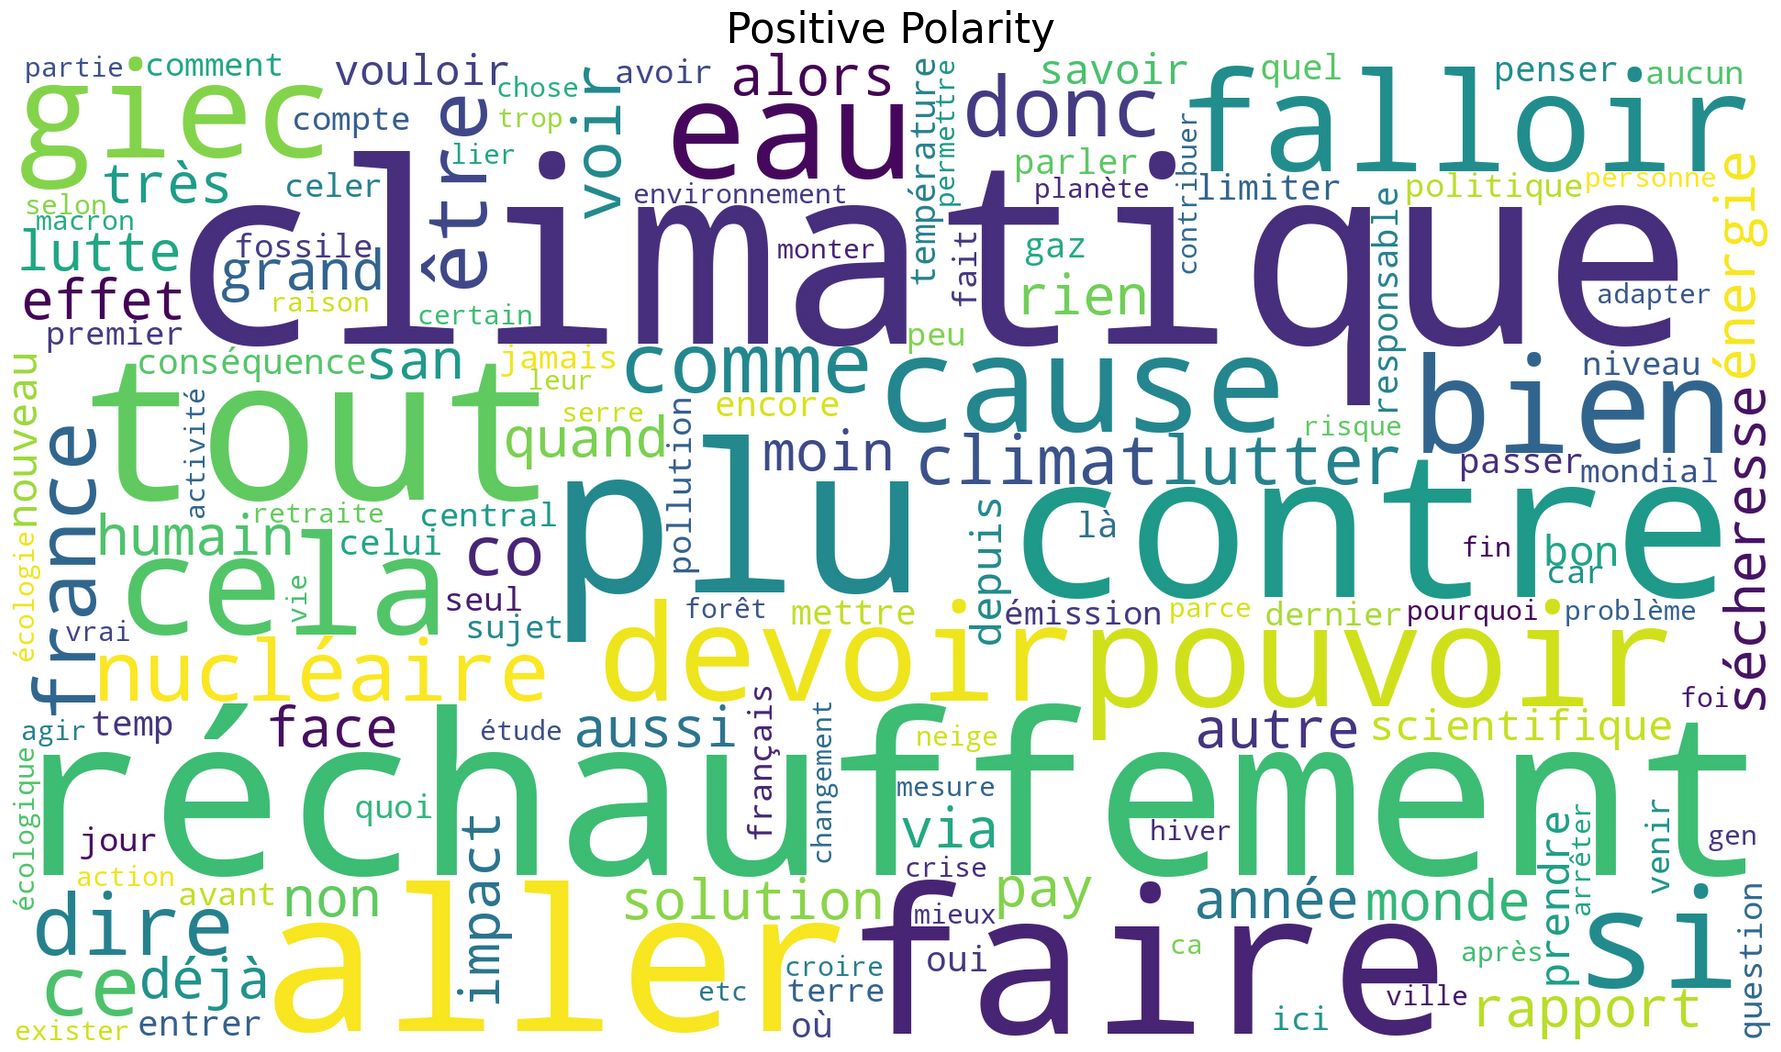

In [11]:
# Display the word clouds using matplotlib
plt.figure(figsize=(50, 50))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='lanczos')
plt.title('Positive Polarity', fontsize=30)
plt.axis('off')
plt.show()

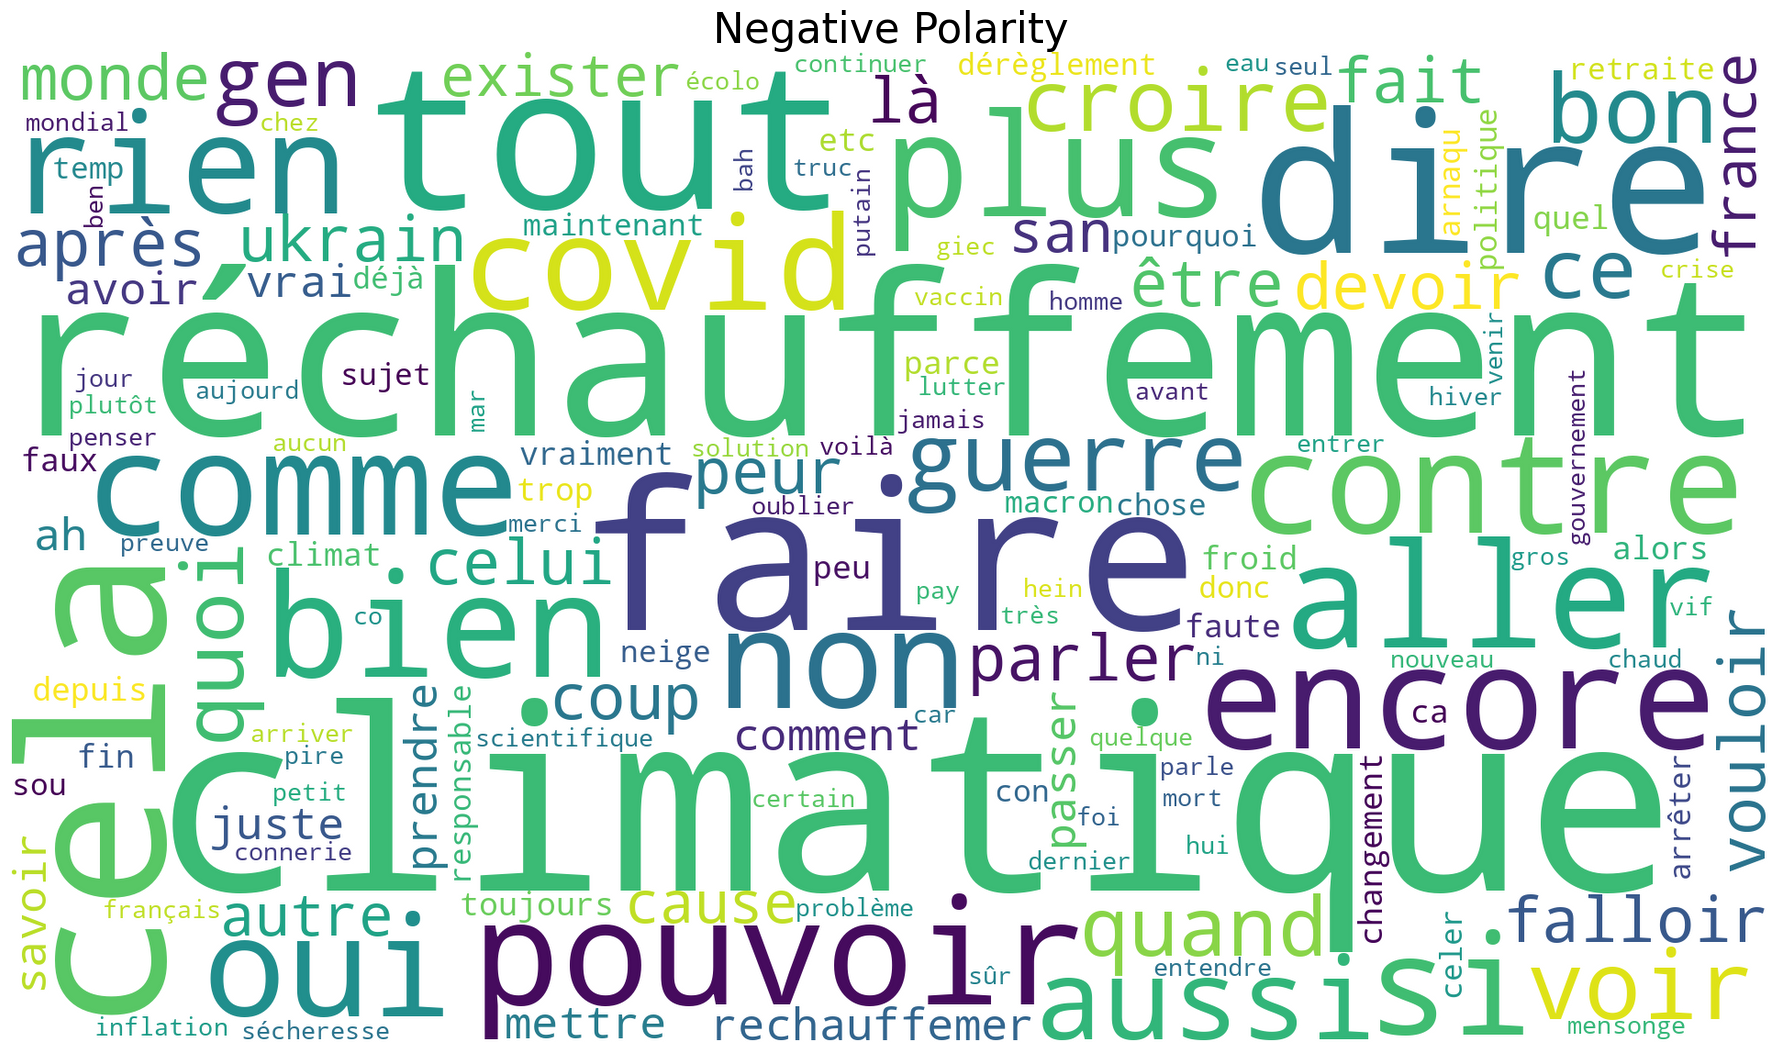

In [12]:
plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud,interpolation='lanczos')
plt.title('Negative Polarity', fontsize=30)
plt.axis('off')

plt.show()


# Analyse supplémentaire

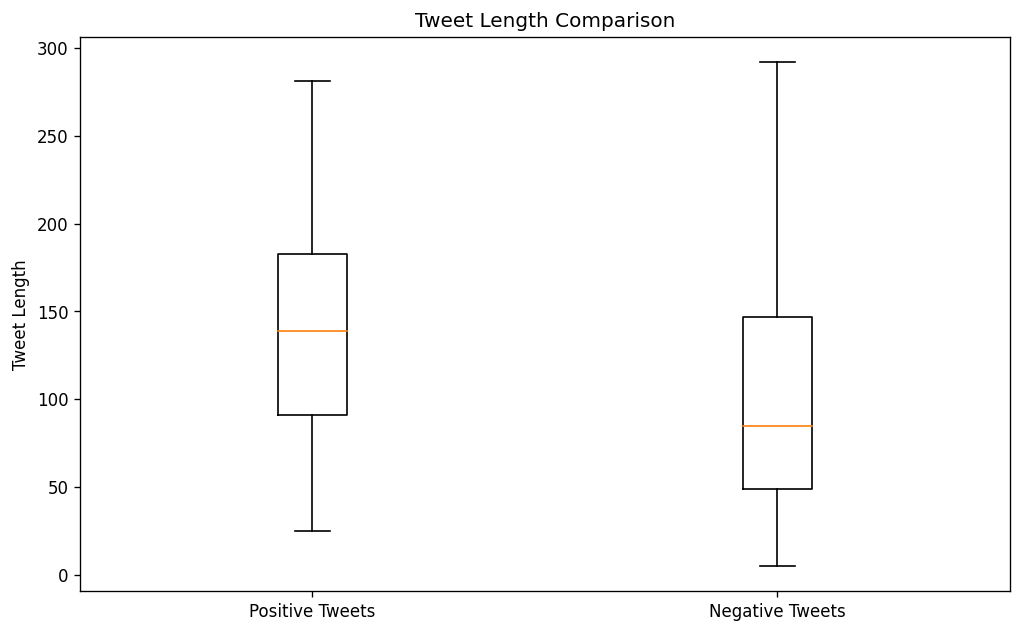

In [13]:
# Calculer la longueur moyenne des tweets positifs et négatifs
positive_tweet_lengths = positive_tweets.apply(lambda x: len(x))
negative_tweet_lengths = negative_tweets.apply(lambda x: len(x))


# Comparer les longueurs des tweets positifs et négatifs avec un boxplot
plt.figure(figsize=(10, 6),dpi=120)
plt.boxplot([positive_tweet_lengths, negative_tweet_lengths])
plt.xticks([1, 2], ['Positive Tweets', 'Negative Tweets'])
plt.title("Tweet Length Comparison")
plt.ylabel("Tweet Length")
plt.show()

In [14]:
mean_positive_length = positive_tweet_lengths.mean()
mean_negative_length = negative_tweet_lengths.mean()

In [15]:
mean_positive_length

136.58811344805608

In [16]:
mean_negative_length

99.3215449046068

In [17]:
import networkx as nx
import math
from pyvis.network import Network

def transform_weight(weight):

    return math.log10(weight)

# Créer une fonction pour générer le réseau de co-occurrence
def generate_word_cooccurrence_network(text):
    # Diviser le texte en mots
    words = text.split()

    # Créer un graphe vide
    G = nx.Graph()

    # Parcourir les mots et leurs occurrences
    for i in range(len(words)):
        word = words[i]

        # Vérifier si le mot existe déjà dans le graphe
        if not G.has_node(word):
            # Ajouter le mot au graphe
            G.add_node(word, label=word)

        # Parcourir les mots suivants dans la fenêtre de co-occurrence
        for j in range(i + 1, min(i + 5, len(words))):
            next_word = words[j]

            # Vérifier si le mot suivant existe déjà dans le graphe
            if not G.has_node(next_word):
                # Ajouter le mot suivant au graphe
                G.add_node(next_word, label=next_word)

            # Vérifier si l'arête existe déjà entre les deux mots et n'est pas une boucle
            if next_word != word and G.has_edge(word, next_word):
                # Augmenter le poids de l'arête existante
                G[word][next_word]['weight'] += 1
            elif next_word != word:
                # Ajouter une nouvelle arête avec un poids initial de 1
                G.add_edge(word, next_word, weight=1)

    return G

# Générer le réseau de co-occurrence pour les tweets positifs
positive_network = generate_word_cooccurrence_network(positive_text)

# Générer le réseau de co-occurrence pour les tweets négatifs
negative_network = generate_word_cooccurrence_network(negative_text)

# Obtenir les arêtes avec leurs poids dans chaque réseau
positive_edges = positive_network.edges(data=True)
negative_edges = negative_network.edges(data=True)

# Obtenir les 15 arêtes avec le poids le plus élevé dans chaque réseau
top_positive_edges = sorted(positive_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:20]
top_negative_edges = sorted(negative_network.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:20]

# Créer un nouveau graphe pour les réseaux de co-occurrence avec les arêtes et les poids
top_positive_network = nx.Graph()
top_positive_network.add_weighted_edges_from(top_positive_edges)

top_negative_network = nx.Graph()
top_negative_network.add_weighted_edges_from(top_negative_edges)

# Créer un objet Network pour la visualisation des graphes
positive_nt = Network(height="1200px", width="100%", bgcolor="#FFFFFF", font_color="black")
negative_nt = Network(height="1200px", width="100%", bgcolor="#FFFFFF", font_color="black")

# Spécifier les noeuds et les arêtes du réseau positif
for u, v, d in top_positive_network.edges(data=True):
    positive_nt.add_node(u, label=u,color='green', border='black')
    positive_nt.add_node(v, label=v,color='green', border='black')
    positive_nt.add_edge(u, v, width=transform_weight(d['weight']['weight']), color='green')

# Spécifier les noeuds et les arêtes du réseau négatif
for u, v, d in top_negative_network.edges(data=True):
        negative_nt.add_node(u, label=u, color='purple', border='black')
        negative_nt.add_node(v, label=v, color='purple', border='black')
        negative_nt.add_edge(u, v, width=transform_weight(d['weight']['weight']), color='purple')

# Save positive network to HTML file
positive_nt.write_html("/content/drive/MyDrive/Projet Intégré S8 (Tweets Réchauffement Climatique)/positive_network.html")

# Save negative network to HTML file
negative_nt.write_html("/content/drive/MyDrive/Projet Intégré S8 (Tweets Réchauffement Climatique)/negative_network.html")